In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
import datetime
import tqdm
from matplotlib import colors
from matplotlib.gridspec import GridSpec
import warnings
import string

(c1,c2,c3,c4)=('#1b9e77','#d95f02','#7570b3','#e7298a')

In [2]:
met_dict = pickle.load(open('met_dict.p','rb'))
stakes = pickle.load(open('/home/robbie/Dropbox/melt_onset_new/pickles/mdf.p','rb'))
df = pickle.load(open('night_df.p','rb'))

In [3]:
lr = linregress(df['diff'],df['Air temperature'])

print(lr)

lr = linregress(df['diff'],df['Air temperature_anom'])

print(lr)

lr = linregress(df['diff'],df['Relative humidity'])

print(lr)


# df['SD_anom'] = df['stake_depth']-(lr[0]*df['days_after_jan1'] + lr[1])

# plt.hexbin(df['days_after_jan1'],df['SD_anom'])

plt.show()

LinregressResult(slope=-2.011915197655201, intercept=-26.545744056781878, rvalue=-0.28839624306401407, pvalue=0.0, stderr=0.023927210559567202, intercept_stderr=0.037010467313543786)
LinregressResult(slope=-0.7783416964906937, intercept=0.6668366711613797, rvalue=-0.15276313136517847, pvalue=0.0, stderr=0.018036504086017525, intercept_stderr=0.02789875749470669)
LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan, intercept_stderr=nan)


In [4]:
df_cloudy_low = df[df['Low cloudiness']>9]
df_clear_total = df[df['Total cloudiness']<1]
df_clear_low = df[df['Low cloudiness']<1]
df_cloudy_high = df_clear_low[df_clear_low['Total cloudiness']>8]

In [ ]:
def pd_(df,ax,xbins,ybins,caption,color):
    
    variable = 'Air temperature_anom'
    
    density, _, _ = np.histogram2d(df['diff'],df[variable],[ybins,xbins])
    
#     print(density.ravel())
    
#     ax.scatter(df['Wind speed'],df['diff'],alpha=0.1,color='grey')
    imsh = ax.imshow(density,cmap='Greys',
                     norm=colors.LogNorm(vmin=1,vmax=1*10**3),
                     extent=[xbins[0],xbins[-1],ybins[-1],ybins[0]],
                    aspect='auto',
                    )
    
    
    centroid = np.nansum(df['diff'])/df.shape[0], np.nansum(df[variable])/df.shape[0]
    print(centroid)
    
    if name !='All Sky':
        print(name)
        ax.scatter(centroid[1],centroid[0],marker='o',s=100,color=color,edgecolor='r',label='Centroid')
        
        ax4.scatter(centroid[1],centroid[0],marker='o',s=100,color=color,edgecolor='r',label=f'{name}')
        
        ax.legend()
    
    ax.set_title(caption,fontsize='xx-large')
    lr = linregress(df[variable],df['diff'])
    
    if lr[3]<0.05:
        x = np.arange(xbins[0],xbins[-1],0.1)  
        y = x*lr[0] + lr[1]
        ax.plot(x,y,color='r',ls='--')
        ax.annotate(f'n = {df.shape[0]}\nr = {np.round(lr[2],2)}\nslope = {np.round(lr[0],2)}',ha='right',va='bottom',xy=(0.97,0.03),fontsize='x-large',xycoords='axes fraction')
        
        
    ax.set_xlim(xbins[0],xbins[-1])
    ax.set_ylim(ybins[0],ybins[-1])

    
    return imsh

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.7542642322842222, 0.07976136900302747)
(0.05419265419265419, 6.229273268940211)
Low Cloud
(0.37752717391304347, 1.836714272749718)
High Cloud
(1.3098501303214596, -4.3795739903531565)
Clear Sky


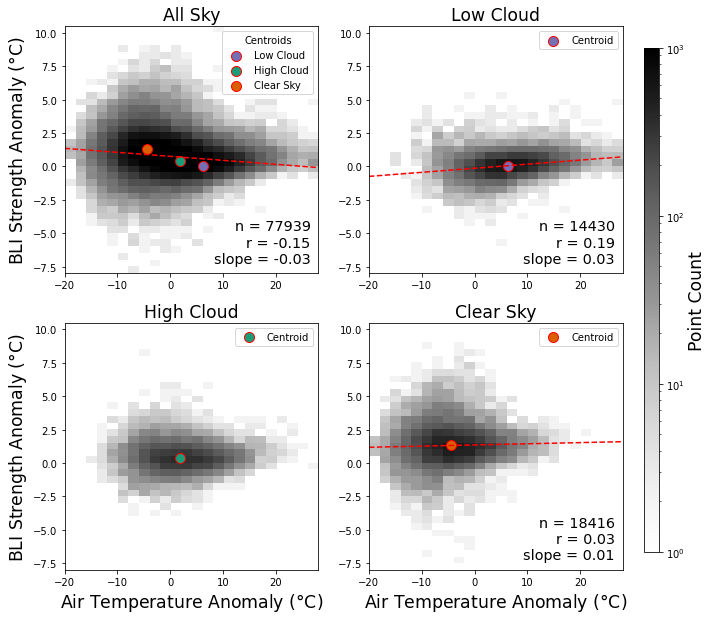

In [19]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
ax4=axs.reshape(-1)[0]
for dfc_,name,ax,color in zip([df,df_cloudy_low,df_cloudy_high,df_clear_total],
                        ['All Sky','Low Cloud','High Cloud','Clear Sky'],
                        axs.reshape(-1),
                             ['r',c3,c1,c2]):
    
    ybins=np.arange(-8,11,0.5)
    xbins=np.arange(-20,30,2)
    
    ishow=pd_(dfc_,ax,xbins,ybins,name,color=color)
    
    ax4.legend(title='Centroids')
    
ax1,ax2,ax3,ax4 = axs.reshape(-1)

for ax in [ax1,ax3]:
    ax.set_ylabel('BLI Strength Anomaly ($\degree$C)',fontsize='xx-large')
    

for ax in [ax3,ax4]:
    ax.set_xlabel('Air Temperature Anomaly ($\degree$C)',fontsize='xx-large')
    

position=fig.add_axes([0.93,0.15,0.02,0.7])  ## the parameters are the specified position you set 
cb = plt.colorbar(ishow,cax=position,orientation='vertical')
cb.set_label('Point Count',fontsize='xx-large')


plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/Inversion/supp_figs/air_temp_cmap.png',dpi=400,bbox_inches='tight')

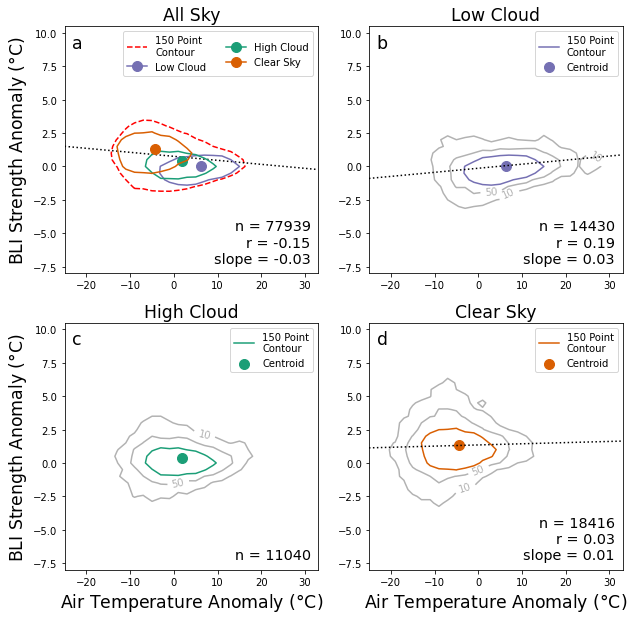

In [15]:
def density(df,ax,xbins,ybins,caption,color):
    
    variable = 'Air temperature_anom'
    yvar = 'diff'
    
    density, _, _ = np.histogram2d(df[yvar],df[variable],[ybins,xbins])
    
    linestyles='-' if name!='All Sky' else '--'
    
    imsh = ax.contour(xbins[:-1],ybins[:-1],density,levels=[150],colors=[color],linestyles=linestyles)
                
    centroid = np.nansum(df[yvar])/df.shape[0], np.nansum(df[variable])/df.shape[0]
    
    ax.plot([],[],color=color,linestyle=linestyles,label='150 Point\nContour')
    
    if name !='All Sky':
        
#         ax.clabel(imsh, inline=1, fontsize=10)
              
        ax.scatter(centroid[1],centroid[0],marker='o',s=100,color=color,label='Centroid')
        
        ax1.plot(centroid[1],centroid[0],marker='o',markersize=10,color=color,label=f'{name}')

        imsh = ax1.contour(xbins[:-1],ybins[:-1],density,levels=[150],colors=[color])

        imsh = ax.contour(xbins[:-1],ybins[:-1],density,levels=[10,50],colors=['k'],alpha=0.3)
        
        ax.clabel(imsh, inline=1, fontsize=10)
        
        ax.legend()
        
    
    ax.set_title(caption,fontsize='xx-large')
    lr = linregress(df[variable],df['diff'])
    if lr[3]<0.05:
        x = np.arange(xbins[0],xbins[-1],0.1)  
        y = x*lr[0] + lr[1]
        ax.plot(x,y,color='k',ls=':')
        ax.annotate(f'n = {df.shape[0]}\nr = {np.round(lr[2],2)}\nslope = {np.round(lr[0],2)}',ha='right',va='bottom',xy=(0.97,0.03),fontsize='x-large',xycoords='axes fraction')
#     ax.set_xticks(np.arange(0,19,3))
    else:
        ax.annotate(f'n = {df.shape[0]}',ha='right',va='bottom',xy=(0.97,0.03),fontsize='x-large',xycoords='axes fraction')
    ax.set_xlim(xbins[0],xbins[-1])
#     ax.axhline(0,color='r',ls='-',lw=0.5)
    ax.set_ylim(ybins[0],ybins[-1])
#     ax.set_yticks(np.arange(-7.5,7.6,2.5))

    
    return imsh


fig, axs = plt.subplots(2,2,figsize=(10,10))
ax1=axs.reshape(-1)[0]
for dfc_,name,ax,color in zip([df,df_cloudy_low,df_cloudy_high,df_clear_total],
                        ['All Sky','Low Cloud','High Cloud','Clear Sky'],
                        axs.reshape(-1),
                             ['r',c3,c1,c2]):
    
    ybins=np.arange(-8,11,0.5)
    xbins=np.arange(-25,35,2)
    
    ishow=density(dfc_,ax,xbins,ybins,name,color=color)
    
    ax1.legend(ncol=2)

ax1,ax2,ax3,ax4 = axs.reshape(-1)

for ax in [ax1,ax3]:
    ax.set_ylabel('BLI Strength Anomaly ($\degree$C)',fontsize='xx-large')
    

for ax in [ax3,ax4]:
    ax.set_xlabel('Air Temperature Anomaly ($\degree$C)',fontsize='xx-large')

for ax,letter in zip(axs.reshape(-1),string.ascii_letters):
    
    ax.annotate(f'{letter}',
                 xycoords='axes fraction',
                 xy=(0.03,0.97),
                 va='top',
                 fontsize='xx-large')
    

plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/Inversion/main_figs/air_temperature.png',dpi=400,bbox_inches='tight')

LinregressResult(slope=-2.5, intercept=37.5, rvalue=-0.7071067811865475, pvalue=0.03314550026377369, stderr=0.9449111825230682, intercept_stderr=5.3173122462207845)


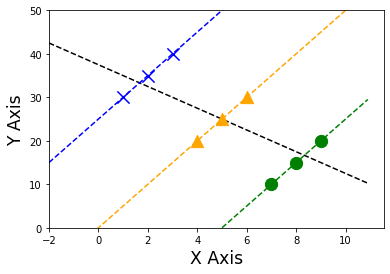

In [20]:
x1 = [1,2,3]
y1 = [30,35,40]

x2 = [4,5,6]
y2 = [20,25,30]


x3 = [7,8,9]
y3 = [10,15,20]

plt.scatter(x1,y1,marker='x',color='b',s=150,zorder=5)
plt.scatter(x2,y2,marker='^',color='orange',s=150,zorder=5)
plt.scatter(x3,y3,marker='o',color='g',s=150,zorder=5)

lr_t = linregress(x1+x2+x3,y1+y2+y3)

x = np.arange(-2,11,0.1)
plt.plot(x,x*lr_t[0]+lr_t[1],color='k',ls='--')

for xd,yd,c in zip([x1,x2,x3],[y1,y2,y3],['b','orange','g']):
    lr = linregress(xd,yd)
    plt.plot(x,x*lr[0]+lr[1],color=c,ls='--')
    
plt.ylim(0,50)
plt.xlim(-2)

plt.ylabel('Y Axis',fontsize='xx-large')

plt.xlabel('X Axis',fontsize='xx-large')

print(lr_t)


plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/Inversion/supp_figs/correlation_schematic.png',dpi=400,bbox_inches='tight')

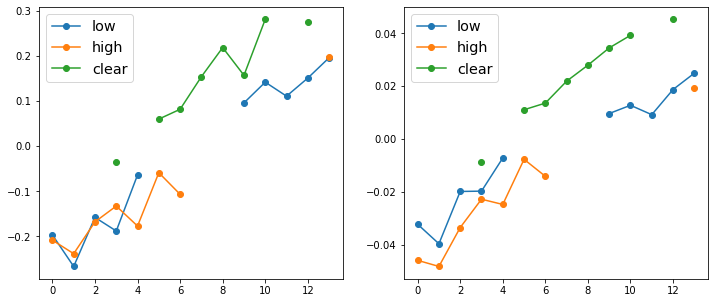

In [122]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))

for dfc_,name in zip([df_cloudy_low,df_cloudy_high,df_clear_total],['low','high','clear']):
    
    r_vals = []
    s_vals = []
    n = []
    
    for i in np.arange(0,16):
        
        dfc=dfc_.copy()
        
        dfc = dfc[dfc['Wind speed']<i+0.1]
        dfc = dfc[dfc['Wind speed']>i-0.1]
        
        try:
            lr = linregress(dfc['Air temperature'],dfc['diff'])
#             lr = linregress(dfc['SD_anom'],dfc['diff'])
#             print(lr)
            p = lr[3]
            if p>0.05:raise
            s = lr[0]
            r = lr[2]
        except:
            r=np.nan
            s=np.nan
            
        r_vals.append(r)
        s_vals.append(s)
        n.append(dfc.shape[0])

    ax1.plot(np.arange(0,16),r_vals,marker='o',label=name)
    ax2.plot(np.arange(0,16),s_vals,marker='o',label=name)
#     ax3.bar(np.arange(0,16),np.array(n)/np.sum(n),label=name,width=1,alpha=0.2)
    
# ax1.set_xlim(-0.5,10.5)
# ax1.set_ylim(0,0.45)
# ax1.set_ylabel('Pearson Correlation\nr Value',fontsize='x-large')

# ax2.set_ylim(0,0.08)
# ax2.set_xlim(-0.5,10.5)
# ax2.set_ylabel('Slope of Linear\nRegression ($\degree$C per m/s)',fontsize='x-large')
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position('right')

for ax in [ax1,ax2]:
    ax.legend(fontsize='x-large')
#     ax.set_xlabel('Wind Speed (m/s)',fontsize='x-large')

plt.show()